# Support Vector Machines

## Challenge

[Data](https://www.kaggle.com/hugodarwood/epirecipes/data)

by: Melissa N 

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


In [2]:
raw_data = pd.read_csv('epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

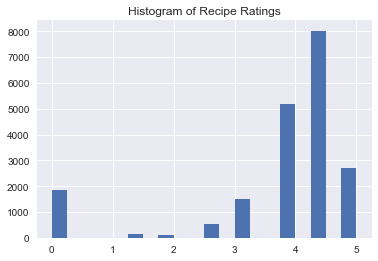

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

There is a class imbalance b.c there are few recipes that have a lot ratings that ate less than 3.   
And a lot of recipes that have 4 and 5.   

In [6]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [7]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.rating
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [8]:
svr.score(X, Y)

0.038565706512988962

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

array([ 0.01818511,  0.026411  ,  0.03037705,  0.01957949,  0.02451197])

In [10]:
from sklearn.cross_validation import train_test_split

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Data Cleaning

In [11]:
# Setting up a  new data frame so we dont change original copy, dropping same values as above
df = pd.DataFrame()
df = raw_data.drop(['title', 'calories', 'protein', 'fat', 'sodium'], 1)

In [12]:
display(df.head())

,rating,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,2.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#df = df.dropna

In [14]:
df['rating'].head()

0    2.500
1    4.375
2    3.750
3    5.000
4    3.125
Name: rating, dtype: float64

In [15]:
# creating a binary/categorical variable for rating above or below 3
df['rating_cat'] = np.where(df['rating']> 4, 1, 0)

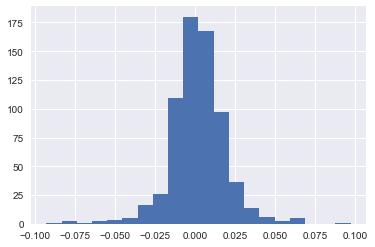

In [16]:
#Correlation_matrix = df.corr()
#Correlation_matrix['rating_cat']
plt.hist(df.corr()['rating_cat'].loc[lambda s: (s < .5)], bins = 20)
plt.show()

This is a sort of normally distributed data set.   
We need to look at the features that have a corellation bigger than abs(0.05) to see the features that we need to focus on.    
The histogram is showing us that most of the features have a correlaion less than abs(0.05)  with the outcome.   

In [17]:
features = list(df.corr()['rating_cat'].loc[lambda s: (abs(s) > .04) & (abs(s) < .5)].index)
print('The list  of important features are:')
print(features)
print('The numbers of important features are: ', len(features))

The list  of important features are:
['alcoholic', 'backyard bbq', 'bitters', 'bon appétit', 'christmas', 'cocktail', 'cocktail party', 'dinner', 'drink', 'fall', 'gin', 'goat cheese', 'grill', 'grill/barbecue', 'harpercollins', 'house & garden', 'low fat', 'pasta', 'peanut free', 'roast', 'rum', 'soy free', 'spirit', 'stuffing/dressing', 'thanksgiving', 'tree nut free']
The numbers of important features are:  26


These are the list of the most important features in our data.  

In [18]:
#X = df.loc[:, ~(df.columns).isin(['rating_cat','rating'])]

X = df.loc[:,features]
Y = df['rating_cat']

In [19]:
data = X
target = Y

In [20]:
# splitting our data into train and testing groups
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

## SVC

In [21]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
print('R² for the SVC model:')
print(svc.score(X_train, Y_train))

R² for the SVC model:
0.568253063551


In [22]:
# saving model predictions
y_SVCpred = svc.predict(X_train)

In [23]:
print('R² for the SVC model on Test set:')
print(svc.score(X_test, Y_test))

R² for the SVC model on Test set:
0.565492021277


In [24]:
print('Scores with a SVC model: ', cross_val_score(svc, X, Y, cv=5))

print('\nAverage Score with a SVC model: ', cross_val_score(svc, X, Y, cv=5).mean())

Scores with a SVC model:  [ 0.5597108   0.56893543  0.56719023  0.56583541  0.57470691]

Average Score with a SVC model:  0.567275754138


In [25]:
print('Classification matrix for SVC model')
print(classification_report(Y_train, y_SVCpred))

Classification matrix for SVC model
             precision    recall  f1-score   support

          0       0.61      0.19      0.29      6505
          1       0.56      0.89      0.69      7531

avg / total       0.58      0.57      0.50     14036



In [26]:
print(pd.crosstab(y_SVCpred, Y_train))

rating_cat     0     1
row_0                 
0           1243   798
1           5262  6733


In [27]:
# saving model predictions on full data
y_pred = svc.predict(data)
score = svc.score(data, target) 
cross_val = cross_val_score(svc, data, target, cv=5)

In [28]:
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))

cm = confusion_matrix(target, y_pred)

df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True']) 

display(df_cm)

t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0] 
f_pos = df_cm.iloc[0,1] 
f_neg = df_cm.iloc[1,0]

a_pos = (target == True).sum() 
a_neg = (target == False).sum() 
p_pos = (y_pred == True).sum() 
p_neg = (y_pred == False).sum() 
tot = data.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))

plusminus = u"\u00B1"
print('\nScore on training set: {:.3%}'.format(score)) 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cross_val.mean(), plusminus, cross_val.std(), cross_val))

#print('\nElapsed Time: {:.2f} seconds'.format(time() - start_time))



Number of mislabeled points out of a total 20052 points : 8674


,Predict False,Predict True
Actual False,1781,7533
Actual True,1141,9597


False Positives (Type I error): 7533 (80.9%)
False Negatives (Type II error): 1141 (10.6%)

Score on training set: 56.742%

Cross validation results: 56.728% ± 0.484% 
 
 [ 0.5597108   0.56893543  0.56719023  0.56583541  0.57470691]


The R square score is not that high.  
But this is predicting about the same on itself 
There is no cause to believe this is overfitting.  

## LINEAR SVC 

In [39]:
svm = SVC(kernel = 'linear')
svm.fit(X_train, Y_train)
print('R² for the linear SVC model:')
print(svm.score(X_train, Y_train))

R² for the linear SVC model:
0.566685665432


In [40]:
# saving model predictions
y_SVMpred = svm.predict(X_train)

In [41]:
print('R² for the linear SVC  model on Test set:')
print(svm.score(X_test, Y_test))

R² for the linear SVC  model on Test set:
0.562001329787


In [42]:
print('Scores with the linear SVC model: ', cross_val_score(svm, X, Y, cv=5))

print('\nAverage Score with the linear SVC model: ', cross_val_score(svm, X, Y, cv=5).mean())

Scores with the linear SVC model:  [ 0.55796559  0.56345051  0.56694091  0.56658354  0.57296084]

Average Score with the linear SVC model:  0.565580279492


In [43]:
print('Classification matrix for the linear SVC m model')
print(classification_report(Y_train, y_SVMpred))

Classification matrix for the linear SVC m model
             precision    recall  f1-score   support

          0       0.60      0.19      0.29      6505
          1       0.56      0.89      0.69      7531

avg / total       0.58      0.57      0.50     14036



In [46]:
print(pd.crosstab(y_SVMpred, Y_train))

rating_cat     0     1
row_0                 
0           1259   836
1           5246  6695


In [44]:
# saving model predictions on full data
y_pred = svm.predict(data)
score = svm.score(data, target) 
cross_val = cross_val_score(svm, data, target, cv=5)

In [45]:
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))

cm = confusion_matrix(target, y_pred)

df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True']) 

display(df_cm)

t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0] 
f_pos = df_cm.iloc[0,1] 
f_neg = df_cm.iloc[1,0]

a_pos = (target == True).sum() 
a_neg = (target == False).sum() 
p_pos = (y_pred == True).sum() 
p_neg = (y_pred == False).sum() 
tot = data.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))

plusminus = u"\u00B1"
print('\nScore on training set: {:.3%}'.format(score)) 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cross_val.mean(), plusminus, cross_val.std(), cross_val))

#print('\nElapsed Time: {:.2f} seconds'.format(time() - start_time))



Number of mislabeled points out of a total 20052 points : 8717


,Predict False,Predict True
Actual False,1809,7505
Actual True,1212,9526


False Positives (Type I error): 7505 (80.6%)
False Negatives (Type II error): 1212 (11.3%)

Score on training set: 56.528%

Cross validation results: 56.558% ± 0.490% 
 
 [ 0.55796559  0.56345051  0.56694091  0.56658354  0.57296084]


This is about the same as the SVC.   
The Linear SVC and SVC gives about the same result.    